In [1]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", 100)
## models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_excel("Raisin_Dataset.xlsx")
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
data.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
538,145693,591.180144,321.431191,0.839272,151644,0.648528,1595.364,Besni
428,48093,329.935742,187.041722,0.823784,49367,0.745108,858.386,Kecimen
206,38585,274.445078,180.957559,0.751829,39926,0.696593,762.439,Kecimen
155,83229,423.844374,253.809071,0.800879,86345,0.653494,1153.434,Kecimen
481,75173,365.803242,267.582782,0.681848,78359,0.679954,1087.034,Besni


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [6]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [7]:
data.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


In [8]:
data["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

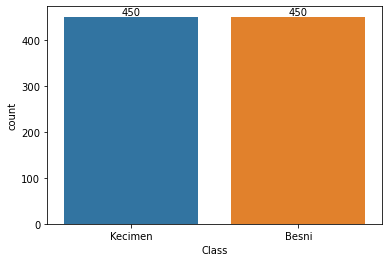

In [9]:
ax = sbn.countplot(x = data["Class"])
ax.bar_label(ax.containers[0]);

In [10]:
data["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [11]:
d = {"Kecimen" : 1, "Besni" : 0}
data["Class"] = data["Class"].map(d)

In [12]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [13]:
data.corr()["Class"]

Area              -0.625715
MajorAxisLength   -0.673194
MinorAxisLength   -0.503102
Eccentricity      -0.438500
ConvexArea        -0.625567
Extent             0.154689
Perimeter         -0.665981
Class              1.000000
Name: Class, dtype: float64

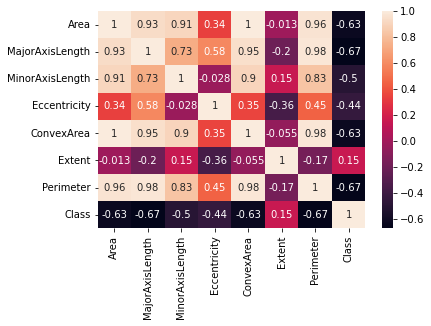

In [14]:
sbn.heatmap(data.corr(), annot = True);

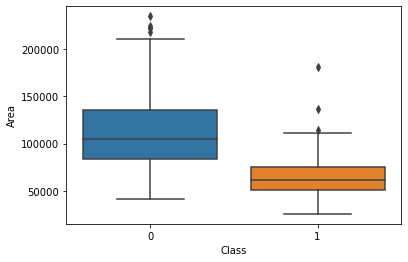

In [15]:
sbn.boxplot(x = data["Class"], y = data["Area"]);

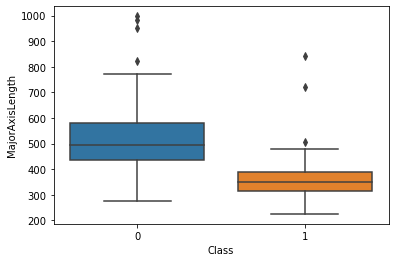

In [16]:
sbn.boxplot(x = data["Class"], y = data["MajorAxisLength"]);

In [17]:
## X and Y
y = data["Class"]
x = data.drop("Class", axis = 1)

In [18]:
def classification(x, y):
    lr = LogisticRegression()
    b = BernoulliNB()
    g = GaussianNB()
    dt = DecisionTreeClassifier(criterion = "gini")   # "gini", "entropy", "log_loss"
    rf = RandomForestClassifier()
    gbs = GradientBoostingClassifier()
    sv = SVC(kernel = "poly")  # 'linear', 'poly', 'rbf', 'sigmoid'
    
    models = [lr, b, g, dt, rf, gbs, sv]
    model_names = ["Logistic", "Bernoulli", "Gaussian", "Decision_Tree", "Random_Forest", 
                   "Gradient_Boost", "Support_Vector"]
    
    sonuc_df = pd.DataFrame(columns = ["Accuracy_Score"], index = model_names)
    accuracy = []
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    sc1 = MinMaxScaler()
    sc2 = StandardScaler()
    #x_train = sc1.fit_transform(x_train)
    #x_test = sc1.fit_transform(x_test)
    x_train = sc2.fit_transform(x_train)
    x_test = sc2.fit_transform(x_test)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy.append(accuracy_score(y_true, y_pred))
    
    sonuc_df["Accuracy_Score"] = accuracy
    return sonuc_df.sort_values("Accuracy_Score", ascending = False)
    

In [19]:
classification(x, y)

,Accuracy_Score
Logistic,0.866667
Bernoulli,0.866667
Random_Forest,0.866667
Gaussian,0.855556
Gradient_Boost,0.855556
Support_Vector,0.838889
Decision_Tree,0.811111


## Outlier temizleme

<AxesSubplot:>

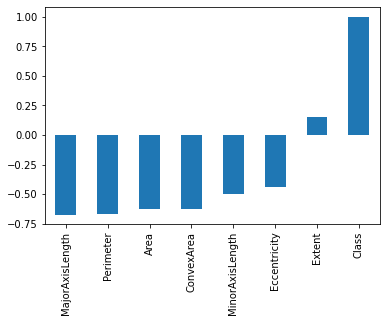

In [21]:
data.corr()["Class"].sort_values().plot(kind = "bar")

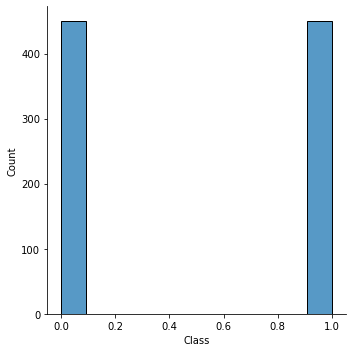

In [22]:
sbn.displot(data["Class"])

<AxesSubplot:xlabel='MajorAxisLength', ylabel='count'>

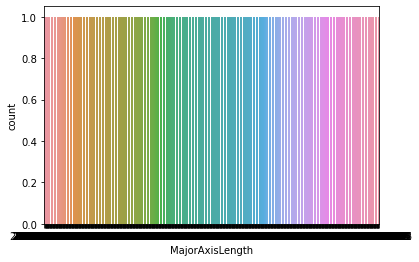

In [23]:
sbn.countplot(data["MajorAxisLength"])

<AxesSubplot:xlabel='MajorAxisLength', ylabel='Class'>

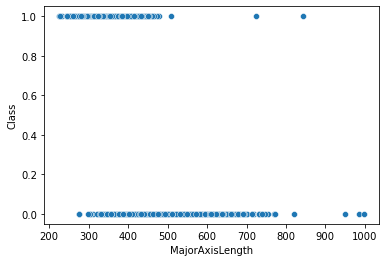

In [24]:
sbn.scatterplot(x = "MajorAxisLength", y = "Class", data = data)

In [25]:
Q1 = data.MajorAxisLength.quantile(0.25)
Q1

345.44289779999997

In [26]:
Q3 = data.MajorAxisLength.quantile(0.75)
Q3

494.187013975

In [27]:
IQR = Q3 - Q1
IQR

148.74411617500004

In [28]:
lower_limit = Q1 - 1.5 * IQR
lower_limit

122.3267235374999

In [29]:
upper_limit = Q3 + 1.5 * IQR
upper_limit

717.3031882375001

In [31]:
## lets find outlier for MajorAxisLength
data[(data.MajorAxisLength < lower_limit) | (data.MajorAxisLength > upper_limit)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
85,180898,843.956653,323.190569,0.923770,221396,0.454189,2253.557,1
290,136340,722.853917,311.341355,0.902490,176818,0.529774,2098.263,1
467,184784,740.108710,320.587830,0.901316,192699,0.645353,1791.568,0
469,195383,755.012914,335.790452,0.895656,204472,0.728769,1893.414,0
487,210923,984.045491,367.279532,0.927737,278217,0.507352,2697.753,0
506,182160,997.291941,271.872395,0.962124,221527,0.379856,2303.690,0
509,169009,719.505878,301.565126,0.907927,174718,0.716927,1781.378,0
540,168620,730.760960,295.500462,0.914594,172003,0.796730,1725.003,0
574,193558,769.425149,321.685834,0.908407,197851,0.605916,1865.297,0
634,169645,731.561876,299.413405,0.912409,174278,0.755516,1753.016,0


In [32]:
new_data = data[(data.MajorAxisLength > lower_limit) | (data.MajorAxisLength < upper_limit)]

In [33]:
y1 = new_data["Class"]
x1 = new_data.drop("Class", axis = 1)

In [34]:
classification(x1, y1)   # for MajorAxisColumns nothing changed

,Accuracy_Score
Logistic,0.866667
Bernoulli,0.866667
Random_Forest,0.861111
Gaussian,0.855556
Gradient_Boost,0.855556
Support_Vector,0.838889
Decision_Tree,0.811111


In [35]:
## we can see the quantile in describe() 
new_data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


In [37]:
Q3 = 1308.3897
Q1 = 966.4107
IQR = Q3- Q1

In [38]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [39]:
new_data = new_data[(new_data.Perimeter > lower_limit) | (new_data.Perimeter < upper_limit)]

In [40]:
y2 = new_data["Class"]
x2 = new_data.drop("Class", axis = 1)

In [41]:
classification(x2, y2)   # az bir değişim var sadece RF ve DT arttı.

,Accuracy_Score
Logistic,0.866667
Bernoulli,0.866667
Random_Forest,0.866667
Gaussian,0.855556
Gradient_Boost,0.855556
Support_Vector,0.838889
Decision_Tree,0.822222
